In [33]:
import os
import requests
import zipfile


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import GridSearchCV,StratifiedKFold,cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

## About the Dataset

# About The Dataset
The original source of the data is Australian Government's Bureau of Meteorology and the latest data can be gathered from [http://www.bom.gov.au/climate/dwo/](http://www.bom.gov.au/climate/dwo/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01).

The dataset you'll use in this project was downloaded from Kaggle at [https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package/](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package?resource=download&select=weatherAUS.csv)  
Column definitions were gathered from [http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml](http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)  

The dataset contains observations of weather metrics for each day from 2008 to 2017, and includes the following fields:

| Field         | Description                                           | Unit            | Type   |
| :------------ | :---------------------------------------------------- | :-------------- | :----- |
| Date          | Date of the Observation in YYYY-MM-DD                 | Date            | object |
| Location      | Location of the Observation                           | Location        | object |
| MinTemp       | Minimum temperature                                   | Celsius         | float  |
| MaxTemp       | Maximum temperature                                   | Celsius         | float  |
| Rainfall      | Amount of rainfall                                    | Millimeters     | float  |
| Evaporation   | Amount of evaporation                                 | Millimeters     | float  |
| Sunshine      | Amount of bright sunshine                             | hours           | float  |
| WindGustDir   | Direction of the strongest gust                       | Compass Points  | object |
| WindGustSpeed | Speed of the strongest gust                           | Kilometers/Hour | object |
| WindDir9am    | Wind direction averaged over 10 minutes prior to 9am  | Compass Points  | object |
| WindDir3pm    | Wind direction averaged over 10 minutes prior to 3pm  | Compass Points  | object |
| WindSpeed9am  | Wind speed averaged over 10 minutes prior to 9am      | Kilometers/Hour | float  |
| WindSpeed3pm  | Wind speed averaged over 10 minutes prior to 3pm      | Kilometers/Hour | float  |
| Humidity9am   | Humidity at 9am                                       | Percent         | float  |
| Humidity3pm   | Humidity at 3pm                                       | Percent         | float  |
| Pressure9am   | Atmospheric pressure reduced to mean sea level at 9am | Hectopascal     | float  |
| Pressure3pm   | Atmospheric pressure reduced to mean sea level at 3pm | Hectopascal     | float  |
| Cloud9am      | Fraction of the sky obscured by cloud at 9am          | Eights          | float  |
| Cloud3pm      | Fraction of the sky obscured by cloud at 3pm          | Eights          | float  |
| Temp9am       | Temperature at 9am                                    | Celsius         | float  |
| Temp3pm       | Temperature at 3pm                                    | Celsius         | float  |
| RainToday     | If there was at least 1mm of rain today               | Yes/No          | object |
| RainTomorrow  | If there is at least 1mm of rain tomorrow             | Yes/No          | object |



## Load the data

In [2]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/_0eYOqji3unP1tDNKWZMjg/weatherAUS-2.csv"
df = pd.read_csv(url)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
df.count()

Date             145460
Location         145460
MinTemp          143975
MaxTemp          144199
Rainfall         142199
Evaporation       82670
Sunshine          75625
WindGustDir      135134
WindGustSpeed    135197
WindDir9am       134894
WindDir3pm       141232
WindSpeed9am     143693
WindSpeed3pm     142398
Humidity9am      142806
Humidity3pm      140953
Pressure9am      130395
Pressure3pm      130432
Cloud9am          89572
Cloud3pm          86102
Temp9am          143693
Temp3pm          141851
RainToday        142199
RainTomorrow     142193
dtype: int64

## Handling Missing Values

In [4]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [5]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56420 entries, 6049 to 142302
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           56420 non-null  object 
 1   Location       56420 non-null  object 
 2   MinTemp        56420 non-null  float64
 3   MaxTemp        56420 non-null  float64
 4   Rainfall       56420 non-null  float64
 5   Evaporation    56420 non-null  float64
 6   Sunshine       56420 non-null  float64
 7   WindGustDir    56420 non-null  object 
 8   WindGustSpeed  56420 non-null  float64
 9   WindDir9am     56420 non-null  object 
 10  WindDir3pm     56420 non-null  object 
 11  WindSpeed9am   56420 non-null  float64
 12  WindSpeed3pm   56420 non-null  float64
 13  Humidity9am    56420 non-null  float64
 14  Humidity3pm    56420 non-null  float64
 15  Pressure9am    56420 non-null  float64
 16  Pressure3pm    56420 non-null  float64
 17  Cloud9am       56420 non-null  float64
 18  Cloud3p

In [6]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [7]:
df.RainTomorrow.unique()

array(['No', 'Yes'], dtype=object)

In [8]:
numerical_features = df.select_dtypes(include = ['float64', 'int64']).columns.tolist()
numerical_features

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [9]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

Most of the data contains information for that particular day, with these available informations it may seem a bit difficult to predict tomorrow's rainfall.
So it's better to predict the rainfall of today based on historical weather data available upto yesterday.
Hence, we rename the features

In [10]:
df = df.rename(columns = {'RainToday': 'RainYesterday',
                         'RainTomorrow': 'RainToday'})

In [12]:
# Check Unique Locations
df.Location.value_counts()

Location
Darwin              3062
Perth               3025
Brisbane            2953
MelbourneAirport    2929
PerthAirport        2913
SydneyAirport       2870
Watsonia            2730
Mildura             2594
MountGambier        2465
NorfolkIsland       2464
Cairns              2444
Townsville          2419
WaggaWagga          2416
AliceSprings        2223
Nuriootpa           2008
Hobart              1939
Moree               1913
Melbourne           1898
Portland            1863
Woomera             1734
Sydney              1690
Sale                1678
CoffsHarbour        1380
Williamtown         1198
Canberra            1078
Cobar                534
Name: count, dtype: int64

As we have a locations from different regions, it's hard to predict rain on a day without considering locations.

RainToday       No  Yes
Location               
AliceSprings  2036  187
Brisbane      2311  642
Cairns        1693  751
Canberra       859  219
Cobar          471   63


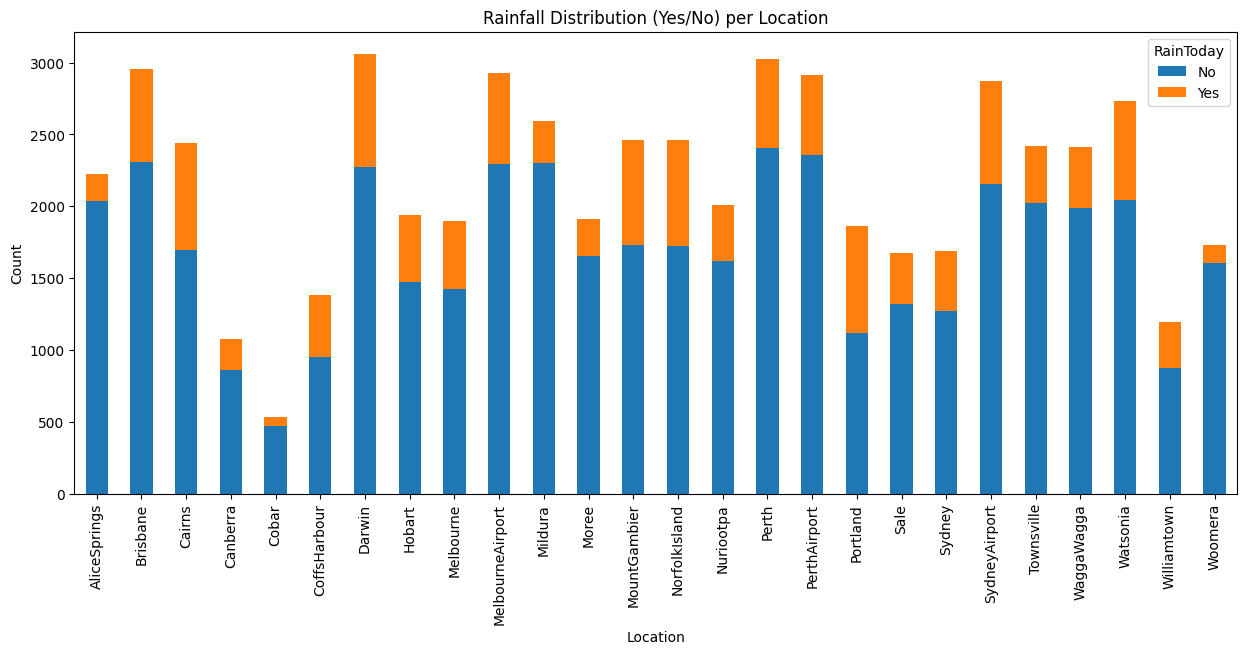

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Count yes/no rainfall per location
rain_counts = df.groupby(["Location", "RainToday"]).size().unstack(fill_value=0)

print(rain_counts.head())  # check the first few rows

# Plot as stacked bar chart
rain_counts.plot(kind="bar", stacked=True, figsize=(15,6))
plt.title("Rainfall Distribution (Yes/No) per Location")
plt.ylabel("Count")
plt.xlabel("Location")
plt.xticks(rotation=90)
plt.show()


## Location Selection

In [15]:
df = df[df.Location.isin(['Melbourne', 'MelbourneAirport', 'Watsonia'])]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7557 entries, 64191 to 80997
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           7557 non-null   object 
 1   Location       7557 non-null   object 
 2   MinTemp        7557 non-null   float64
 3   MaxTemp        7557 non-null   float64
 4   Rainfall       7557 non-null   float64
 5   Evaporation    7557 non-null   float64
 6   Sunshine       7557 non-null   float64
 7   WindGustDir    7557 non-null   object 
 8   WindGustSpeed  7557 non-null   float64
 9   WindDir9am     7557 non-null   object 
 10  WindDir3pm     7557 non-null   object 
 11  WindSpeed9am   7557 non-null   float64
 12  WindSpeed3pm   7557 non-null   float64
 13  Humidity9am    7557 non-null   float64
 14  Humidity3pm    7557 non-null   float64
 15  Pressure9am    7557 non-null   float64
 16  Pressure3pm    7557 non-null   float64
 17  Cloud9am       7557 non-null   float64
 18  Cloud3pm

## Extracting Seasonaility

In [16]:
def date_to_season(date):
    month = date.month
    if month in [1,2,12]:
        return 'Summer'
    elif month in [3,4,5]:
        return 'Autumn'
    elif month in [6,7,8]:
        return 'Winter'
    elif month in [9,10,11]:
        return 'Spring'

In [17]:
df['Date'] = pd.to_datetime(df.Date)
df['Season'] = df['Date'].apply(date_to_season)
df.Season.unique()

array(['Summer', 'Autumn', 'Winter', 'Spring'], dtype=object)

In [18]:
df = df.drop(columns = ['Date'], axis = 1)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainYesterday,RainToday,Season
64191,MelbourneAirport,11.2,19.9,0.0,5.6,8.8,SW,69.0,W,SW,...,37.0,1005.1,1006.4,7.0,7.0,15.9,18.1,No,Yes,Summer
64192,MelbourneAirport,7.8,17.8,1.2,7.2,12.9,SSE,56.0,SW,SSE,...,43.0,1018.0,1019.3,6.0,7.0,12.5,15.8,Yes,No,Summer
64193,MelbourneAirport,6.3,21.1,0.0,6.2,10.5,SSE,31.0,E,S,...,35.0,1020.8,1017.6,1.0,7.0,13.4,19.6,No,No,Summer
64194,MelbourneAirport,8.1,29.2,0.0,6.4,12.5,SSE,35.0,NE,SSE,...,23.0,1016.2,1012.8,5.0,4.0,16.0,28.2,No,No,Summer
64195,MelbourneAirport,9.7,29.0,0.0,7.4,12.3,SE,33.0,SW,SSE,...,31.0,1011.9,1010.3,6.0,2.0,19.4,27.1,No,No,Summer


## Define the feature and target dataframes

In [19]:
X = df.drop(columns = ['RainToday'])
y = df['RainToday']

In [20]:
y.value_counts()

RainToday
No     5766
Yes    1791
Name: count, dtype: int64

In [21]:
y.head()

64191    Yes
64192     No
64193     No
64194     No
64195     No
Name: RainToday, dtype: object

In [22]:
5766/(5766+1791)

0.7630011909487892

76% probability for not having rain on a day in Melbourne

## Split the dataset into training and test

In [23]:
X_train, X_test, y_train ,y_test = train_test_split(X,y, test_size = 0.2, random_state=42,stratify=y)

## Define preprocessing transformers for numerical and categorical features

In [28]:
# listing out numerical features and categorical features
numerical_features = X_train.select_dtypes(include = ['float64', 'int64']).columns.tolist()

categorical_features = X_train.select_dtypes(include = ['object']).columns.tolist()

In [29]:
print(f"Numerical features: {numerical_features}\n")
print(f"Categorical features: {categorical_features}")

Numerical features: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

Categorical features: ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainYesterday', 'Season']


## Setup Transformers for two kinds of features and combine them into one

In [32]:
numerical_transformers = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformers = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [34]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformers,numerical_features),
        ('cat', categorical_transformers, categorical_features)
    ]
)

In [35]:
preprocessor

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


## Create a pipeline by combining the preprocessor and classifier

In [36]:
pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42,))
])

## Define a parameter grid to use in cross validation grid search model optimizer

In [50]:
param_grid = {
    'classifier__n_estimators':[50,100,150,200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split':[2,5]
}

## pipeline usage in crossvalidation

In [51]:
cv = StratifiedKFold(n_splits=5,shuffle = True, random_state=42)

## Creating the model through the gridsearchcv

In [52]:
model = GridSearchCV(estimator = pipeline, param_grid=param_grid,scoring = 'accuracy', cv = cv, verbose = 2)
model.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.5s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.4s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.4s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.4s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.5s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.9s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.8s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time

,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'classifier__max_depth': [None, 10, ...], 'classifier__min_samples_split': [2, 5], 'classifier__n_estimators': [50, 100, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


## Evaluate the performance on the test dataset

In [56]:
test_score = model.score(X_test, y_test)
test_score

0.8465608465608465

In [53]:
pred = model.predict(X_test)
print(f"Classification Report:\n {classification_report(y_test, pred)}")

Classification Report:
               precision    recall  f1-score   support

          No       0.87      0.95      0.90      1154
         Yes       0.75      0.53      0.62       358

    accuracy                           0.85      1512
   macro avg       0.81      0.74      0.76      1512
weighted avg       0.84      0.85      0.84      1512



## Get the confusion matrices

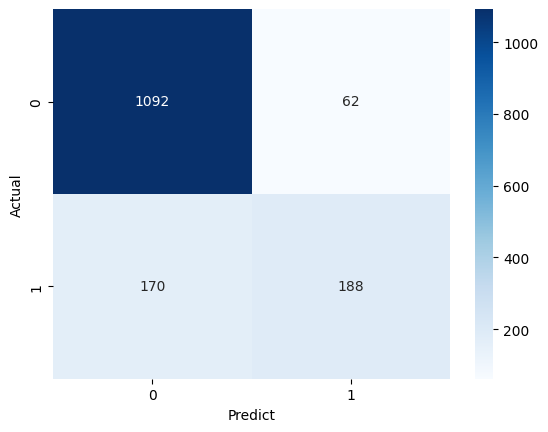

In [54]:
conf_matrix = confusion_matrix(y_test, pred)

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues')

plt.xlabel("Predict")
plt.ylabel("Actual")
plt.show()

In [55]:
model.best_estimator_

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [59]:
# print out the best parameters
model.best_estimator_.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MinTemp', 'MaxTemp',
                                                   'Rainfall', 'Evaporation',
                                                   'Sunshine', 'WindGustSpeed',
                                                   'WindSpeed9am',
                                                   'WindSpeed3pm',
                                                   'Humidity9am', 'Humidity3pm',
                                                   'Pressure9am', 'Pressure3pm',
 

## Feature Importances

In [63]:
feature_importances = model.best_estimator_['classifier'].feature_importances_
feature_importances, feature_importances.shape

(array([0.04071602, 0.04213338, 0.02846078, 0.03500716, 0.08256992,
        0.05000277, 0.03171544, 0.03115374, 0.03642154, 0.11380651,
        0.08468014, 0.09330219, 0.02324652, 0.03621487, 0.03940716,
        0.04760034, 0.00562222, 0.00639098, 0.00541292, 0.0009428 ,
        0.00120469, 0.00049788, 0.00663505, 0.00103499, 0.00279917,
        0.00385136, 0.00216413, 0.00340716, 0.00081165, 0.00306192,
        0.00356936, 0.00394202, 0.00382683, 0.00217244, 0.00372985,
        0.00131487, 0.00211547, 0.00048481, 0.00723695, 0.00275431,
        0.00316227, 0.00313435, 0.00192217, 0.00170219, 0.00083602,
        0.00147924, 0.00174374, 0.00341285, 0.00354576, 0.00271484,
        0.00355396, 0.00065908, 0.00126049, 0.00027007, 0.00514258,
        0.00238292, 0.00285842, 0.00373249, 0.00370988, 0.00434214,
        0.00104477, 0.0035095 , 0.00399387, 0.00366027, 0.00272986,
        0.00342948, 0.00325006, 0.0069909 , 0.00564809, 0.00632215,
        0.00634394, 0.00520838, 0.00488097]),
 (

In [62]:
X_train.shape

(6045, 22)

In [65]:
features = list(model.best_estimator_['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features))

In [68]:
len(features)

57

In [71]:
feature_names = numerical_features + features


feature_importances = model.best_estimator_['classifier'].feature_importances_

importance_df = pd.DataFrame({'Feature': feature_names,
                             'Importance': feature_importances}).sort_values(by = 'Importance', ascending = False)



In [72]:
importance_df

,Feature,Importance
9,Humidity3pm,0.113807
11,Pressure3pm,0.093302
10,Pressure9am,0.084680
4,Sunshine,0.082570
5,WindGustSpeed,0.050003
...,...,...
28,WindGustDir_SE,0.000812
51,WindDir3pm_E,0.000659
21,WindGustDir_ESE,0.000498
37,WindDir9am_ESE,0.000485


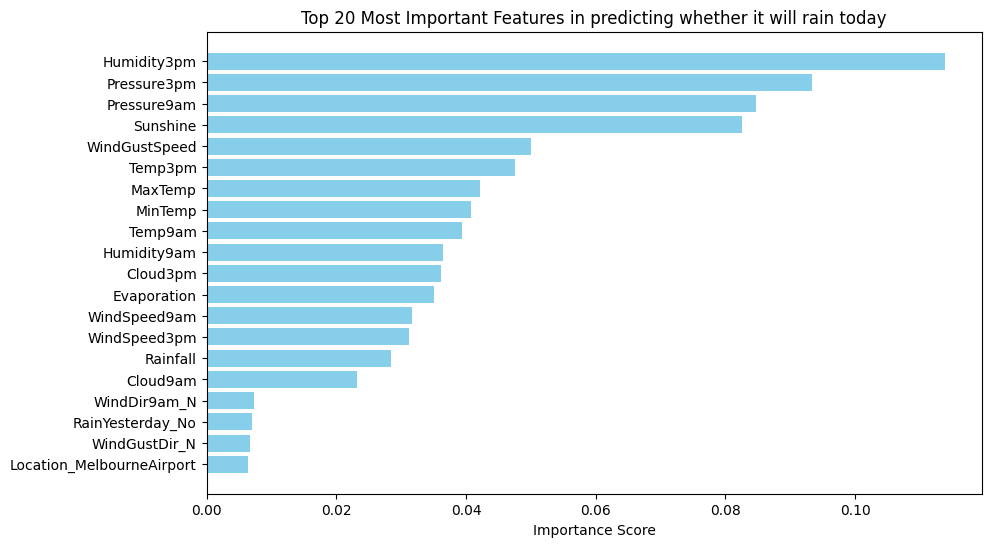

In [73]:
N = 20
top_features = importance_df.head(N)
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature on top
plt.title(f'Top {N} Most Important Features in predicting whether it will rain today')
plt.xlabel('Importance Score')
plt.show()

The model does well while predicting no rain in a specific day. As the dataset is imbalanced and having no rain outnumbered having rain in a large quantity. As a result, when it's time to predict raining, the model suffers and gives a lots of false negative (actually raining, but model predicts no rain) prediction.

## Try another model

In [75]:
### upgrade the pipeline and the parameter grid
from sklearn.linear_model import LogisticRegression
pipeline.set_params(classifier = LogisticRegression(random_state=42))


model.estimator = pipeline

param_grid = {
    'classifier__solver':['liblinear'],
    'classifier__penalty': ['l1','l2'],
    'classifier__class_weight': [None, 'balanced']
}

model.param_grid = param_grid


# fit the updated pipeline with logisticregression
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.5s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.6s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.3s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.3s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.3s
[CV] END classifier__class_weight=None, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.1s
[CV] END classifier__class_weight=None, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.2s
[CV] END classifier__class_weight=None, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.1s
[CV] END classifier__class_weight=No

In [78]:
print(f"Score: {model.score(X_test, y_test)}")

Score: 0.830026455026455


Classification Score using Logisticregression:
              precision    recall  f1-score   support

          No       0.86      0.93      0.89      1154
         Yes       0.69      0.51      0.59       358

    accuracy                           0.83      1512
   macro avg       0.77      0.72      0.74      1512
weighted avg       0.82      0.83      0.82      1512



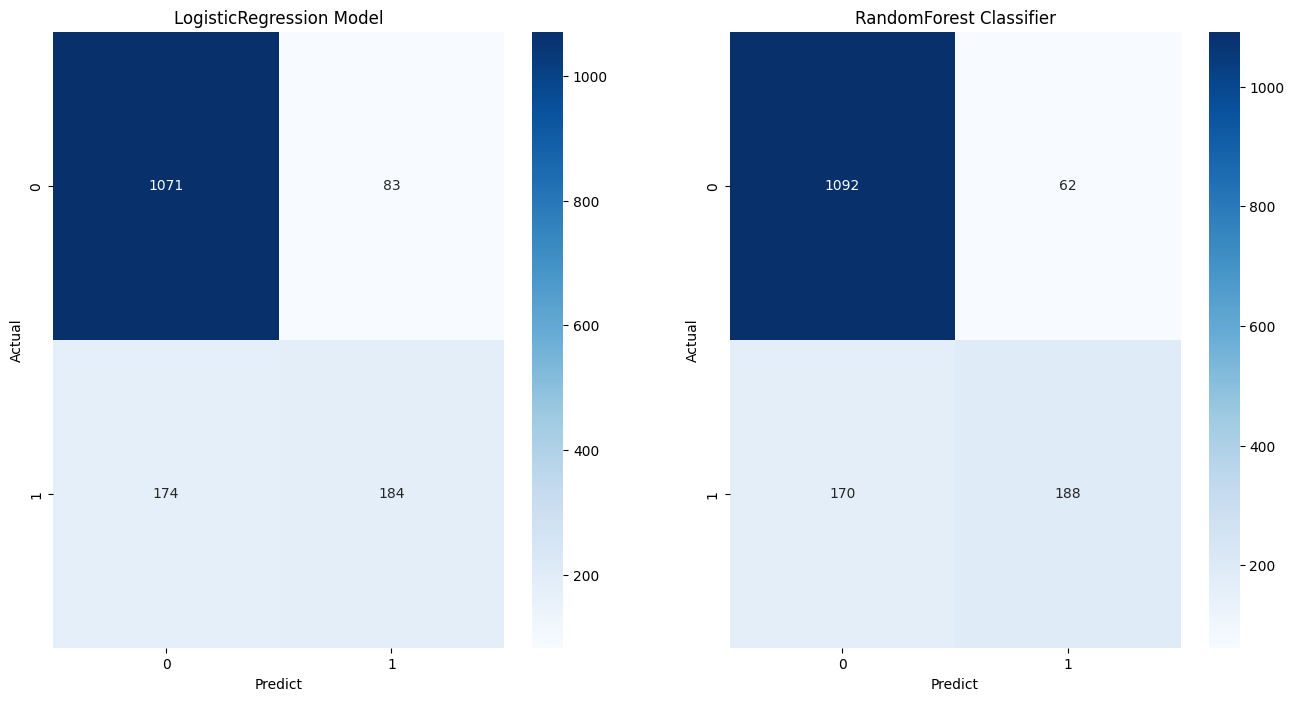

In [82]:
## Get the classification score and confusion matrix
print(f"Classification Score using Logisticregression:\n{classification_report(y_test, y_pred)}")

conf_matrix_lr = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (16,8))
plt.subplot(1,2,1)
sns.heatmap(conf_matrix_lr, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel("Predict")
plt.ylabel("Actual")
plt.title('LogisticRegression Model')
plt.subplot(1,2,2)
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel("Predict")
plt.ylabel("Actual")
plt.title('RandomForest Classifier')
plt.show()